# 📊 ESC-50 Dataset Exploration

This notebook is the first step in our sound classification project using the ESC-50 dataset.  
We'll explore the metadata file (`esc50.csv`) to understand:

- How the dataset is structured
- What kinds of sounds are included
- How labels and folds are organized

This will help us plan how to preprocess the audio data and structure our training/validation split later on.


In [1]:
import pandas as pd

# Load metadata CSV
csv_path = "C:\Documents\sound-classifier\data\ESC-50-master\meta\esc50.csv"
df = pd.read_csv(csv_path)

print(f"Total samples: {len(df)}")
print(f"Number of classes: {df['category'].nunique()}")
print("\nClass distribution:")
print(df['category'].value_counts())
df.head()


Total samples: 2000
Number of classes: 50

Class distribution:
category
dog                 40
chirping_birds      40
vacuum_cleaner      40
thunderstorm        40
door_wood_knock     40
can_opening         40
crow                40
clapping            40
fireworks           40
chainsaw            40
airplane            40
mouse_click         40
pouring_water       40
train               40
sheep               40
water_drops         40
church_bells        40
clock_alarm         40
keyboard_typing     40
wind                40
footsteps           40
frog                40
cow                 40
brushing_teeth      40
car_horn            40
crackling_fire      40
helicopter          40
drinking_sipping    40
rain                40
insects             40
laughing            40
hen                 40
engine              40
breathing           40
crying_baby         40
hand_saw            40
coughing            40
glass_breaking      40
snoring             40
toilet_flush        40
pig     

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


- Total samples: 2000.

- 50 classes: A multi-class classification problem.

- Class distribution: Every class has exactly 40 samples, which means:

    ✔️ No class imbalance (very helpful for training).

    ✔️ We can do stratified splitting or use the built-in fold column.

In [2]:
print("Fold distribution:\n")
print(df['fold'].value_counts().sort_index())


Fold distribution:

fold
1    400
2    400
3    400
4    400
5    400
Name: count, dtype: int64


Each sample in ESC-50 belongs to one of 5 folds, which we’ll use for cross-validation.

We can treat one fold as validation or test, and the other four as training.

Let’s now check how labels are encoded.

In [3]:
label_set = sorted(df['category'].unique())
label_to_idx = {label: idx for idx, label in enumerate(label_set)}

print("Number of labels:", len(label_to_idx))
print("\nSample label mapping:")
for label, idx in list(label_to_idx.items())[:10]:
    print(f"{label:20} -> {idx}")


Number of labels: 50

Sample label mapping:
airplane             -> 0
breathing            -> 1
brushing_teeth       -> 2
can_opening          -> 3
car_horn             -> 4
cat                  -> 5
chainsaw             -> 6
chirping_birds       -> 7
church_bells         -> 8
clapping             -> 9


Even though we saw the counts are equal, let's visualize the distribution for EDA purposes.

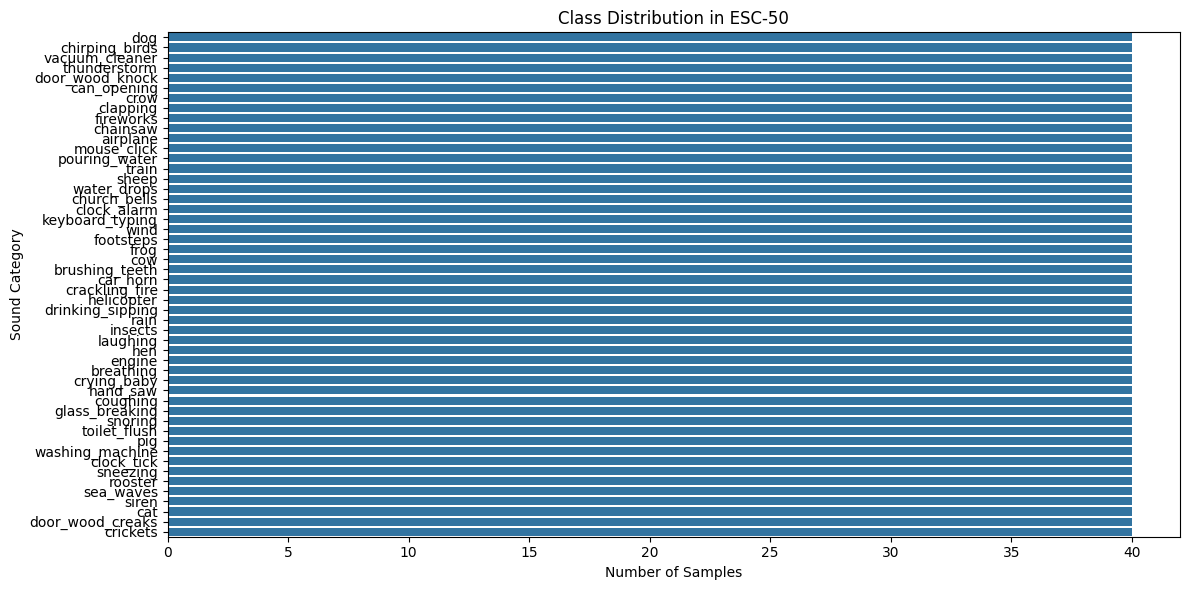

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index)
plt.title("Class Distribution in ESC-50")
plt.xlabel("Number of Samples")
plt.ylabel("Sound Category")
plt.tight_layout()
plt.show()


Now, we will visualize a sample sound and its Mel-Spectrogram

But first...

## 🎵 What is a Mel-Spectrogram?

A **mel-spectrogram** is a visual representation of sound, showing how the **energy of different frequencies** changes over time — but using a **scale that matches human hearing**.

### 🔊 Why not use raw audio?

Raw audio is just a 1D wave — it’s hard for a model to extract meaningful patterns directly from it.

Instead, we convert audio into a **2D image-like format** (time vs. frequency), where:
- The **x-axis** is time (in seconds)
- The **y-axis** is frequency (in Hz, scaled using the mel scale)
- The **color** shows the intensity (volume) of each frequency at each point in time

This turns sound into something a **Convolutional Neural Network (CNN)** can understand — just like it processes images!

### 🎧 What is the "mel scale"?

The **mel scale** compresses frequencies so that they match how humans actually perceive sound:
- We are better at hearing pitch differences at **lower frequencies** than at higher ones.
- The mel scale spaces frequencies in a way that mimics this human sensitivity.

### 🧠 Why are we using mel-spectrograms?

- They're the **standard input** for most audio classification tasks.
- They allow us to use **image-based deep learning models** like CNNs.
- They capture **temporal and frequency features** that are critical for recognizing different sound types.

In short: they turn audio into something a machine can "see" and classify effectively.


Class: dog
File: 1-100032-A-0.wav


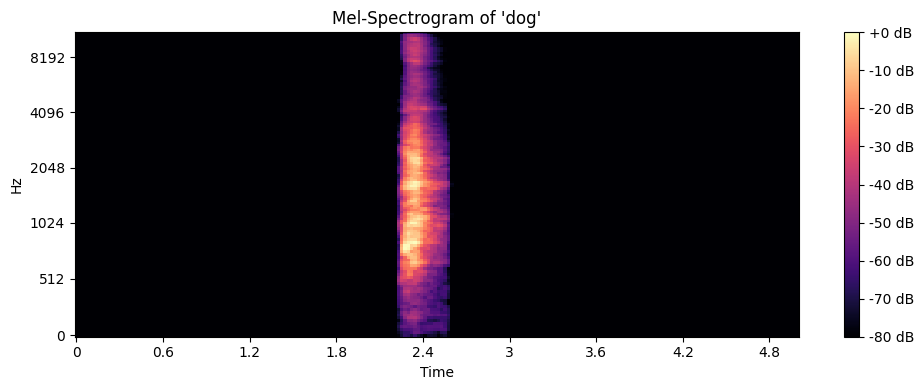

In [7]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Picking a sample
sample = df.iloc[0]
file_path = f"C:/Documents/sound-classifier/data/ESC-50-master/audio/1-100032-A-0.wav"
print("Class:", sample['category'])
print("File:", sample['filename'])

# Load audio
y, sr = librosa.load(file_path, sr=22050)

# Create mel spectrogram
mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_db = librosa.power_to_db(mel, ref=np.max)

# Plot
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
plt.title(f"Mel-Spectrogram of '{sample['category']}'")
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


🔍 What we see:

- The signal is centered around ~2.4s, meaning most of the audio content (in this case, a "dog" sound) occurs in a small time window.

- Higher intensity (lighter colors) represents stronger energy in specific frequency bands.

- It’s a vertical “burst” — typical for short, sharp sounds like a bark.